In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import Pool, CatBoostRegressor, cv

In [145]:
df_train_path = 'data/train.csv'
df_test_path = 'data/test.csv'

In [146]:
df = pd.read_csv(df_train_path)
df_test = pd.read_csv(df_test_path)

**Id** - идентификационный номер квартиры  
**DistrictId** - идентификационный номер района  
**Rooms** - количество комнат  
**Square** - площадь  
**LifeSquare** - жилая площадь  
**KitchenSquare** - площадь кухни  
**Floor** - этаж  
**HouseFloor** - количество этажей в доме  
**HouseYear** - год постройки дома  
**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности  
**Social_1, Social_2, Social_3** - социальные показатели местности  
**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья  
**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров  
**Price** - цена квартиры

## Посмотрим на данные

In [147]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [149]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


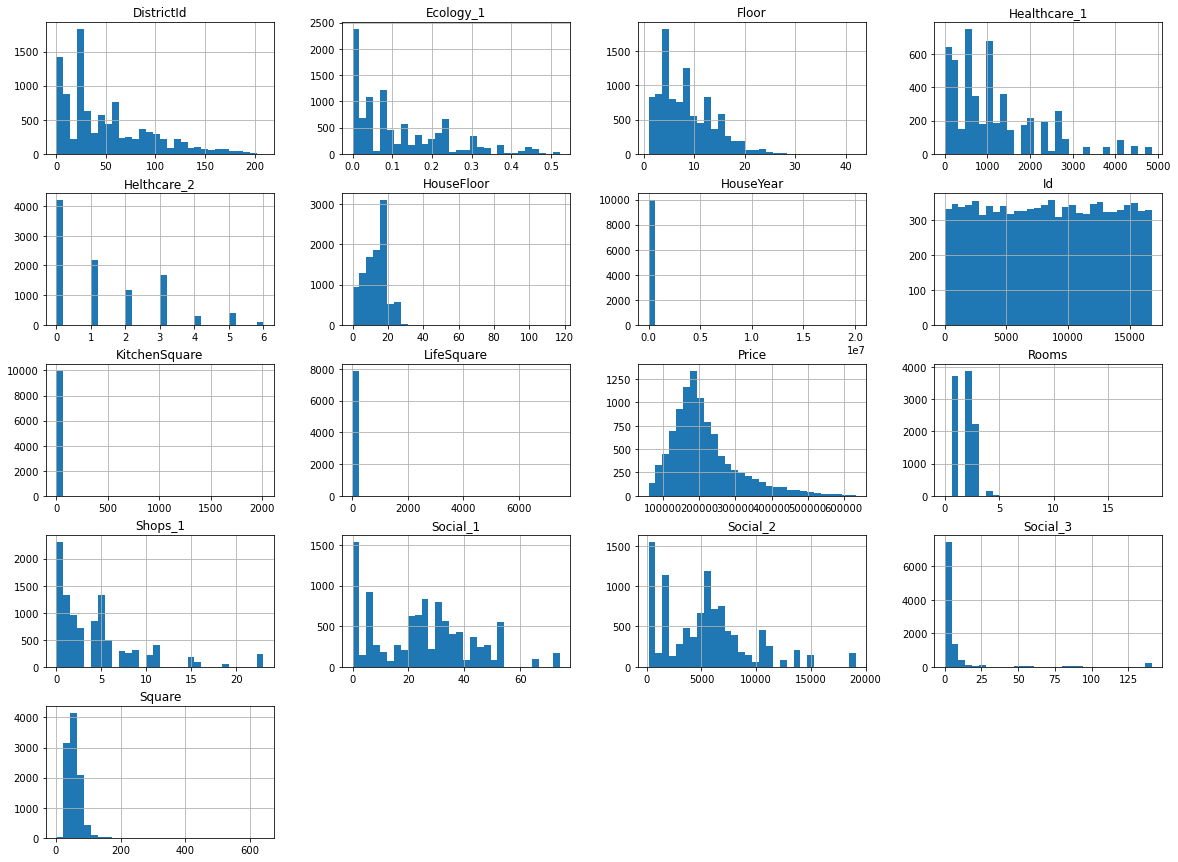

In [150]:
df.hist(bins = 30, figsize=(20,15))
plt.show()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### Перобразуем типы, удаляем ненужное

In [152]:
df.drop('Id', axis=1, inplace=True)
df['DistrictId'] = df['DistrictId'].astype(str)

## Обработка выбросов и пропусков

### Кол-во комнат в квартире

In [153]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [154]:
out_rooms = (df['Rooms'] < 1) | (df['Rooms'] > 5)
df.loc[out_rooms, ['Rooms', 'Square']]
# Очевидно, что все эти результаты - выбросы. Обработаем их.
# А последнее значение еще и выброс по площади (её мы удалим потом).

,Rooms,Square
2004,10.0,59.056975
2194,0.0,38.697117
2728,10.0,60.871266
3780,0.0,41.790881
5894,0.0,49.483501
6088,19.0,42.006046
6401,0.0,87.762616
7644,0.0,212.932361
7929,0.0,81.491446
8794,6.0,59.414334


In [155]:
sq_per_room = round(df['Square'].median() / df['Rooms'].median(), 2)
print(f'В среднем на каждую комнату приходится {sq_per_room} кв. м. общей площади')

В среднем на каждую комнату приходится 26.26 кв. м. общей площади


In [156]:
df.loc[out_rooms, 'Rooms'] = round(df['Square'] / sq_per_room)
df.loc[(out_rooms) & (df['Square'] > 80), 'Rooms'] = 3
df.loc[(out_rooms) & (df['Square'] > 120), 'Rooms'] = 4
df.loc[(out_rooms) & (df['Square'] > 150), 'Rooms'] = 5

In [157]:
df.loc[out_rooms]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
2194,88,1.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
2728,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863
3780,27,2.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,28,2.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
6088,1,2.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
6401,27,3.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
7644,27,5.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7929,6,3.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
8794,99,2.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


### Обрабатываем площади
Скорее всего в общей площади наименьшее кол-во ошибок и выбросов, поэтому начнем с неё. И потом уже на её основании будем править остальные.
#### Общая площадь

In [158]:
out_square = (df['Square'] < 20) | (df['Square'] > 300)
df.loc[out_square]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
161,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
328,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
726,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
1401,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
3686,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,B,B,49,11395,3,1406.0,3,4,A,77835.185808
4496,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
4800,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083
5009,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
5870,21,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,B,B,47,8004,3,125.0,3,5,B,79913.267856
6632,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,B,B,25,4756,16,2857.0,5,8,B,88871.750230


In [159]:
# В данном случае считаю, что данные, в которых аномалий больше, чем 1, проще удалить, чем учитывать их в рассчетах
out_floor = (df['Floor'] > df['HouseFloor'])
df.drop(df[out_square & out_floor].index, inplace=True)

In [160]:
# Для каждой квартиры назначим медианную площадь в соответствии с кол-вом комнат
for i in range(1, 6):
    df.loc[out_square & (df['Rooms'] == i), 'Square'] = \
                                    df[df['Rooms'] == i]['Square'].median()

In [161]:
df.loc[out_square]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
328,27,3.0,77.421742,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
726,9,2.0,55.841812,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
1401,5,1.0,40.413110,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
3686,57,3.0,77.421742,16.698571,8.0,5,5.0,1962,0.133215,B,B,49,11395,3,1406.0,3,4,A,77835.185808
5870,21,1.0,40.413110,8.822988,0.0,2,5.0,1965,0.194489,B,B,47,8004,3,125.0,3,5,B,79913.267856
7010,102,1.0,40.413110,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
7209,0,1.0,40.413110,15.541536,0.0,2,5.0,1962,0.319809,B,B,25,4756,16,2857.0,5,8,B,102395.788856
8330,101,1.0,40.413110,15.170851,3.0,5,5.0,1970,0.225825,A,B,41,6558,7,1548.0,3,2,B,115845.861527
8501,62,2.0,55.841812,NaN,1.0,4,20.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,180750.471749
8572,6,1.0,40.413110,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458


#### Жилая площадь
Выбросом по жилой площади будем считать ситуацию если
1. Жилая площадь больше, чем 90% от общей
2. Жилая площадь меньше, чем 30% от общей

In [162]:
out_life_square = ((df['LifeSquare'] >= df['Square']*0.9) | (df['LifeSquare'] < df['Square']*0.3) \
                   | (df['LifeSquare'].isnull()))
df.loc[out_life_square]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
8,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945
18,1,1.0,47.582480,NaN,1.0,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,1,2.0,63.324025,NaN,1.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114
9987,1,2.0,62.690057,64.602939,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698
9990,21,1.0,40.413110,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,6,2.0,62.648779,NaN,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872


In [163]:
# Заполним жилую площадь как произведение жилой и отношения медианы жилой и медианы общей площади
# для каждого типа квартиры (с разбивкой по кол-ву комнат)
for i in range(1, 6):
    j = df[~out_life_square & (df['Rooms'] == i)]['LifeSquare'].median() / \
          df[~out_life_square & (df['Rooms'] == i)]['Square'].median()
    df.loc[out_life_square & (df['Rooms'] == i), 'LifeSquare'] = df['Square'] * j

In [164]:
df.loc[out_life_square]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,71.621632,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3,1,1.0,40.409907,21.907228,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
8,1,1.0,46.887892,25.419107,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,6,3.0,79.867477,49.729399,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945
18,1,1.0,47.582480,25.795660,1.0,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,1,2.0,63.324025,39.172825,1.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114
9987,1,2.0,62.690057,38.780647,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698
9990,21,1.0,40.413110,21.908965,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,6,2.0,62.648779,38.755112,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872


#### Площадь кухни

In [165]:
df['KitchenSquare'].value_counts()

1.0       2454
8.0       1306
5.0       1169
10.0      1074
6.0       1038
9.0        843
0.0        695
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [166]:
# Заполним жилую площадь как произведение жилой и отношения медианы пл. кухни и медианы общей площади
# для каждого типа квартиры (с разбивкой по кол-ву комнат)
out_KS = (df['KitchenSquare'] < 5) | (df['KitchenSquare'] > df['Square']*0.3)
df.loc[out_KS]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3,1,1.0,40.409907,21.907228,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
8,1,1.0,46.887892,25.419107,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,6,3.0,79.867477,49.729399,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945
18,1,1.0,47.582480,25.795660,1.0,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810
19,45,1.0,42.367289,22.968374,1.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,27,1.0,36.112393,19.577437,1.0,9,16.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,94881.691800
9983,1,2.0,63.324025,39.172825,1.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114
9990,21,1.0,40.413110,21.908965,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,6,2.0,62.648779,38.755112,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872


In [167]:
for i in range(1, 6):
    j = df[~out_KS & (df['Rooms'] == i)]['KitchenSquare'].median() / \
          df[~out_life_square & (df['Rooms'] == i)]['Square'].median()
    df.loc[out_KS & (df['Rooms'] == i), 'KitchenSquare'] = df['Square'] * j

In [168]:
df.loc[out_KS]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3,1,1.0,40.409907,21.907228,8.289983,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
8,1,1.0,46.887892,25.419107,9.618924,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,6,3.0,79.867477,49.729399,9.665485,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945
18,1,1.0,47.582480,25.795660,9.761417,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810
19,45,1.0,42.367289,22.968374,8.691534,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,27,1.0,36.112393,19.577437,7.408359,9,16.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,94881.691800
9983,1,2.0,63.324025,39.172825,9.793172,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114
9990,21,1.0,40.413110,21.908965,8.290640,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,6,2.0,62.648779,38.755112,9.688744,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872


### Этажи и этажность

In [169]:
# Ситуация, при которой скорее всего при вводе данных перепутали этаж квартиры и этажность здания
out_floor1 = (df['Floor'] > df['HouseFloor']) & (df['HouseFloor'] > 0) & (df['Floor'] < 50)
df['TmpFloor'] = df.loc[out_floor1, 'Floor']
df.loc[out_floor1, 'Floor'] = df['HouseFloor']
df.loc[out_floor1, 'HouseFloor'] = df['TmpFloor']
df.drop('TmpFloor', axis=1, inplace=True)
df.loc[out_floor1]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
17,8,2.0,49.396000,28.299600,5.000000,5.0,6.0,1962,0.458174,B,A,26,4439,1,1130.0,1,5,B,186971.926566
19,45,1.0,42.367289,22.968374,8.691534,14.0,16.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
21,20,3.0,75.611065,47.494621,8.000000,9.0,11.0,1976,0.019509,B,B,37,7687,11,176.0,5,5,B,366916.246494
25,6,2.0,65.409965,40.463207,10.115767,1.0,18.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,191205.272608
26,88,3.0,83.262530,51.843325,10.076351,1.0,13.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,410883.892020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,57,1.0,38.485252,22.550608,8.000000,17.0,19.0,1992,0.133215,B,B,49,11395,3,1406.0,3,4,A,183485.284995
9960,48,3.0,96.056784,59.809654,11.624699,1.0,15.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
9968,1,3.0,86.487550,53.851380,10.466640,17.0,18.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,248248.935528
9970,6,1.0,41.310416,19.117077,9.000000,17.0,18.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,114878.830713


In [170]:
#Ситуация, в которой этажность == 0 или более 50.
out_floor2 = (df['HouseFloor'] < 1) | (df['HouseFloor'] > 50)
df.loc[out_floor2]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
24,27,1.0,44.203947,23.964073,9.068320,2.0,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958
152,53,2.0,56.023342,34.656555,8.664109,14.0,0.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,247074.564832
159,74,1.0,46.449711,25.181558,9.529032,6.0,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,168705.450148
186,62,1.0,44.954880,24.371172,9.222372,8.0,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,133773.301722
229,45,3.0,81.094922,50.493666,9.814029,15.0,0.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,442472.456032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,27,1.0,42.936724,23.277079,8.808352,2.0,0.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,129674.841139
9931,1,1.0,47.402412,25.698041,9.724476,14.0,0.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,174740.301224
9940,6,1.0,41.224118,22.348632,8.457016,8.0,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,125612.639104
9950,48,3.0,98.994909,61.639074,11.980268,3.0,0.0,1977,0.041125,B,B,46,9515,5,NaN,1,10,B,418817.004446


In [171]:
# Заменим этажность на моду среди квартир с таким же этажем.
j = df[out_floor2]['Floor'].unique()
for i in j:
    df.loc[(out_floor2) & (df['Floor'] == i), 'HouseFloor'] = \
                df.loc[~out_floor2 & (df['Floor'] == i),'HouseFloor'].mode()[0]

In [172]:
df.loc[out_floor2]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
24,27,1.0,44.203947,23.964073,9.068320,2.0,5.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958
152,53,2.0,56.023342,34.656555,8.664109,14.0,17.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,247074.564832
159,74,1.0,46.449711,25.181558,9.529032,6.0,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,168705.450148
186,62,1.0,44.954880,24.371172,9.222372,8.0,9.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,133773.301722
229,45,3.0,81.094922,50.493666,9.814029,15.0,17.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,442472.456032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,27,1.0,42.936724,23.277079,8.808352,2.0,5.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,129674.841139
9931,1,1.0,47.402412,25.698041,9.724476,14.0,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,174740.301224
9940,6,1.0,41.224118,22.348632,8.457016,8.0,9.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,125612.639104
9950,48,3.0,98.994909,61.639074,11.980268,3.0,5.0,1977,0.041125,B,B,46,9515,5,NaN,1,10,B,418817.004446


### Год постройки

In [173]:
out_year = (df['HouseYear'] > 2020) | (df['HouseYear'] < 1900)
df[out_year]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,147,2.0,44.791836,28.360393,5.0,4.0,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
9163,109,1.0,37.265070,20.239714,9.0,9.0,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


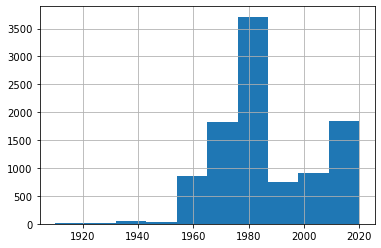

In [174]:
# Заменим выбросы года постройки на моду
df.loc[out_year, 'HouseYear'] = df['HouseYear'].mode()[0]
df['HouseYear'].hist()

### Экология

In [175]:
# Пока оставим всё как есть
#df['Ecology_2'].hist()
#df['Ecology_3'].value_counts()

### Социалка

In [176]:
# Пока оставим всё как есть
#df['Social_1'].hist()
#df['Social_1'].value_counts()

### Медицина

In [177]:
#Удалим признак с большим количеством пропусков
df.drop('Healthcare_1', axis=1, inplace=True)
# df['Helthcare_2'].hist()
# df['Helthcare_2'].value_counts()

### Магазины

In [178]:
# df['Shops_1'].hist()
# df['Shops_1'].value_counts()
# df['Shops_2'].hist()
# df['Shops_2'].value_counts()

### Новые признаки

###  Является ли этаж крайним (первый или последний)

In [179]:
df['FirstFloor'] = 0
df['LastFloor'] = 0
df.loc[df['Floor'] == 1, 'FirstFloor'] = 1
df.loc[df['Floor'] == df['HouseFloor'], 'LastFloor'] = 1

### Условный размер кухни

In [180]:
bins = [0, 6, 9, df['KitchenSquare'].max()]
df['Kitchen_cat'] = pd.cut(df['KitchenSquare'], bins=bins, labels=False)
# df['Kitchen_cat'].fillna(-1, inplace=True)

### Наличие лифта

In [181]:
df['Lift'] = 0
df.loc[df['HouseFloor'] > 5, 'Lift'] = 1

### Периоды постройки домов (сталинки, хрущевки и.т.д.)

In [182]:
bins = [0, 1920, 1945, 1956, 1970, 1995, 2000, df['HouseYear'].max()]
df['HouseAge'] = pd.cut(df['HouseYear'], bins=bins, labels=False)

### Группировка по социалке (что бы это ни значило)

In [183]:
df['Soc4'] = (df['Social_1'] + 1) * (df['Social_2'] + 1) * (df['Social_3'] + 1 )
bins = [0, df['Soc4'].quantile(0.25), df['Soc4'].quantile(0.5), df['Soc4'].quantile(0.75), float('inf')]
df['SocCat'] = pd.cut(df['Soc4'], bins=bins, labels=False)
df.drop('Soc4', axis=1, inplace=True)

### Читерские признаки (target encoding)

#### Средняя цена квартиры с разбивкой по периоду и кол-ву комнат

In [184]:
MPByAgeRooms = df.groupby(['HouseAge', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                                    .rename(columns={'Price':'MPByAgeRooms'})
df = df.merge(MPByAgeRooms, on=['HouseAge', 'Rooms'], how='left')

#### Средняя цена квартиры с разбивкой по району и году дома

In [185]:
MPByDisrtRooms = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                                    .rename(columns={'Price':'MPByDisrtRooms'})

df = df.merge(MPByDisrtRooms, on=['DistrictId', 'Rooms'], how='left')

##### Средняя цена квартиры с разбивкой по району и социалкой

In [186]:
MPByDisrtSocCat = df.groupby(['DistrictId', 'SocCat'], as_index=False).agg({'Price':'median'})\
                                                    .rename(columns={'Price':'MPByDisrtSocCat'})

df = df.merge(MPByDisrtSocCat, on=['DistrictId', 'SocCat'], how='left')

##### Средняя цена квартиры с разбивкой по категории кухни и комнатам

In [187]:
MPByKitchRooms = df.groupby(['Kitchen_cat', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                                    .rename(columns={'Price':'MPByKitchRooms'})

df = df.merge(MPByKitchRooms, on=['Kitchen_cat', 'Rooms'], how='left')

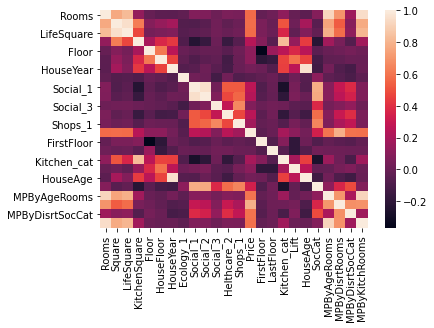

In [188]:
sns.heatmap(df.corr());

## Функция по транформации данных

In [189]:
def df_transform(df_t):
    df_t.drop('Id', axis=1, inplace=True)
    df_t['DistrictId'] = df_t['DistrictId'].astype(str)
    
    #Комнаты
    out_rooms = (df_t['Rooms'] < 1) | (df_t['Rooms'] > 5)
    sq_per_room = round(df_t['Square'].median() / df_t['Rooms'].median(), 2)
    df_t.loc[out_rooms, 'Rooms'] = round(df_t['Square'] / sq_per_room)
    df_t.loc[(out_rooms) & (df_t['Square'] > 80), 'Rooms'] = 3
    df_t.loc[(out_rooms) & (df_t['Square'] > 120), 'Rooms'] = 4
    df_t.loc[(out_rooms) & (df_t['Square'] > 150), 'Rooms'] = 5
    
    # Площади
    out_square = (df_t['Square'] < 20) | (df_t['Square'] > 300)
    for i in range(1, 6):
        df_t.loc[out_square & (df_t['Rooms'] == i), 'Square'] = \
                                        df_t[df_t['Rooms'] == i]['Square'].median()
    
    out_life_square = ((df_t['LifeSquare'] >= df_t['Square']*0.9) | (df_t['LifeSquare'] < df_t['Square']*0.3) \
                   | (df_t['LifeSquare'].isnull()))
    for i in range(1, 6):
        j = df_t[~out_life_square & (df_t['Rooms'] == i)]['LifeSquare'].median() / \
              df_t[~out_life_square & (df_t['Rooms'] == i)]['Square'].median()
        df_t.loc[out_life_square & (df_t['Rooms'] == i), 'LifeSquare'] = df_t['Square'] * j
    
    out_KS = (df_t['KitchenSquare'] < 5) | (df_t['KitchenSquare'] > df_t['Square']*0.3)
    for i in range(1, 6):
        j = df_t[~out_KS & (df_t['Rooms'] == i)]['KitchenSquare'].median() / \
              df_t[~out_life_square & (df_t['Rooms'] == i)]['Square'].median()
        df_t.loc[out_KS & (df_t['Rooms'] == i), 'KitchenSquare'] = df_t['Square'] * j
    
    # Этажи
    out_floor1 = (df_t['Floor'] > df_t['HouseFloor']) & (df_t['HouseFloor'] > 0) & (df_t['Floor'] < 50)
    df_t['TmpFloor'] = df_t.loc[out_floor1, 'Floor']
    df_t.loc[out_floor1, 'Floor'] = df_t['HouseFloor']
    df_t.loc[out_floor1, 'HouseFloor'] = df_t['TmpFloor']
    df_t.drop('TmpFloor', axis=1, inplace=True)
    
    out_floor2 = (df_t['HouseFloor'] < 1) | (df_t['HouseFloor'] > 50)
    j = df_t[out_floor2]['Floor'].unique()
    for i in j:
        df_t.loc[(out_floor2) & (df_t['Floor'] == i), 'HouseFloor'] = \
                    df_t.loc[~out_floor2 & (df_t['Floor'] == i),'HouseFloor'].mode()[0]
        
    # Год постройки
    out_year = (df_t['HouseYear'] > 2020) | (df_t['HouseYear'] < 1900)
    df_t.loc[out_year, 'HouseYear'] = df_t['HouseYear'].mode()[0]
    
    df_t.drop('Healthcare_1', axis=1, inplace=True)
    
    binary_to_numbers = {'A': 0, 'B': 1}
    df_t['Ecology_2'] = df_t['Ecology_2'].map(binary_to_numbers)
    df_t['Ecology_3'] = df_t['Ecology_3'].map(binary_to_numbers)
    df_t['Shops_2'] = df_t['Shops_2'].map(binary_to_numbers)
    
    return df_t

## Функция генерации новых признаков

In [190]:
def df_new_features(df, is_test=False, fill_na = False, MPByAgeRooms = MPByAgeRooms, MPByDisrtRooms = MPByDisrtRooms, 
                    MPByDisrtSocCat = MPByDisrtSocCat, MPByKitchRooms = MPByKitchRooms):
    # Признак первого и последнего этажа
    df['FirstFloor'] = 0
    df['LastFloor'] = 0
    df.loc[df['Floor'] == 1, 'FirstFloor'] = 1
    df.loc[df['Floor'] == df['HouseFloor'], 'LastFloor'] = 1
    
    # Категория кухни (маленькая, средняя, большая )
    bins = [0, 6, 9, df['KitchenSquare'].max()]
    df['Kitchen_cat'] = pd.cut(df['KitchenSquare'], bins=bins, labels=False)
#     df['Kitchen_cat'].fillna(-1, inplace=True)
    
    # Есть ли лифт в доме
    df['Lift'] = 0
    df.loc[df['HouseFloor'] > 5, 'Lift'] = 1
    
    # Периоды постройки домов
    bins = [0, 1920, 1945, 1956, 1970, 1995, 2000, df['HouseYear'].max() + 1]
    df['HouseAge'] = pd.cut(df['HouseYear'], bins=bins, labels=False)
#     df['HouseAge'].fillna(-1, inplace=True)
    
    # Группировка по социалке
    df['Soc4'] = (df['Social_1'] + 1) * (df['Social_2'] + 1) * (df['Social_3'] + 1 )
    bins = [0, df['Soc4'].quantile(0.25), df['Soc4'].quantile(0.5), df['Soc4'].quantile(0.75), float('inf')]
    df['SocCat'] = pd.cut(df['Soc4'], bins=bins, labels=False)
    df.drop('Soc4', axis=1, inplace=True)
#     df['SocCat'].fillna(-1, inplace=True)
    
    if not is_test:
        MPByAgeRooms = df.groupby(['HouseAge', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                                    .rename(columns={'Price':'MPByAgeRooms'})
        MPByDisrtRooms = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                                    .rename(columns={'Price':'MPByDisrtRooms'})
        MPByDisrtSocCat = df.groupby(['DistrictId', 'SocCat'], as_index=False).agg({'Price':'median'})\
                                                    .rename(columns={'Price':'MPByDisrtSocCat'})
        MPByKitchRooms = df.groupby(['Kitchen_cat', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                                            .rename(columns={'Price':'MPByKitchRooms'})
    
    df = df.merge(MPByAgeRooms, on=['HouseAge', 'Rooms'], how='left')
    df = df.merge(MPByDisrtRooms, on=['DistrictId', 'Rooms'], how='left')
    df = df.merge(MPByDisrtSocCat, on=['DistrictId', 'SocCat'], how='left')
    df = df.merge(MPByKitchRooms, on=['Kitchen_cat', 'Rooms'], how='left')
    
    if fill_na:
        df['MPByAgeRooms'].fillna(df['MPByAgeRooms'].median(), inplace=True)
        df['MPByDisrtRooms'].fillna(df['MPByDisrtRooms'].median(), inplace=True)
        df['MPByDisrtSocCat'].fillna(df['MPByDisrtSocCat'].median(), inplace=True)
    
    return df

## Разбиение датасета на train и test

In [191]:
binary_to_numbers = {'A': 0, 'B': 1}
df['Ecology_2'] = df['Ecology_2'].map(binary_to_numbers)
df['Ecology_3'] = df['Ecology_3'].map(binary_to_numbers)
df['Shops_2'] = df['Shops_2'].map(binary_to_numbers)

In [192]:
col_drop_list = ['Price']
X = df.drop(col_drop_list, axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [193]:
X.columns.array.size

27

In [194]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,FirstFloor,LastFloor,Kitchen_cat,Lift,HouseAge,SocCat,MPByAgeRooms,MPByDisrtRooms,MPByDisrtSocCat,MPByKitchRooms
0,27,3.0,115.027311,71.621632,10.000000,4.0,10.0,2014,0.075424,1,...,0,0,2,1,6,0,305018.871089,213688.711749,143958.841355,285568.519189
1,22,1.0,39.832524,23.169223,8.000000,7.0,8.0,1966,0.118537,1,...,0,0,1,1,3,1,158709.187758,146032.829834,186161.900526,155976.200077
2,1,3.0,78.342215,47.671972,10.000000,2.0,17.0,1988,0.025609,1,...,0,0,2,1,4,1,252480.400098,244005.272380,202460.612785,285568.519189
3,1,1.0,40.409907,21.907228,8.289983,10.0,22.0,1977,0.007122,1,...,0,0,1,1,4,0,150074.211867,146574.015522,182031.077766,155976.200077
4,94,2.0,64.285067,38.562517,9.000000,16.0,16.0,1972,0.282798,1,...,0,1,1,1,4,2,196773.317028,201584.441255,201584.441255,219566.820640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,61,2.0,49.090728,33.272626,6.000000,3.0,12.0,1981,0.300323,1,...,0,0,0,1,4,3,196773.317028,232514.855623,223802.460550,196084.177342
9987,27,2.0,64.307684,37.038420,9.000000,13.0,17.0,1977,0.072158,1,...,0,0,1,1,4,0,196773.317028,165478.896000,143958.841355,219566.820640
9988,178,1.0,29.648057,16.555363,5.000000,3.0,5.0,1958,0.460556,1,...,0,0,0,0,3,2,158709.187758,165953.912580,204858.524238,155533.375006
9989,21,1.0,32.330292,22.326870,5.000000,3.0,9.0,1969,0.194489,1,...,0,0,0,1,3,3,158709.187758,153921.400690,182602.286983,155533.375006


### Кросс-валидация

In [195]:
def cross_val(X, y, model, splits=3):
    cv_score = cross_val_score(model, X, y, scoring='r2', cv=KFold(n_splits=splits, shuffle=True, random_state=25))
    return cv_score.mean()

## Обучение и предсказание

In [200]:
featches = X.columns.array
# Все признаки:
# ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2', 'FirstFloor', 'LastFloor', 'Kitchen_cat', 'Lift', 'HouseAge', 'SocCat', 'MPByAgeRooms', 'MPByDisrtRooms', 'MPByDisrtSocCat', 'MPByKitchRooms']
# featches = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2', 'FirstFloor', 'LastFloor', 'Kitchen_cat', 'Lift', 'HouseAge', 'MPByDisrtRooms', 'MPByDisrtSocCat']
featches = ['DistrictId', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2', 'FirstFloor', 'LastFloor', 'Kitchen_cat', 'Lift', 'HouseAge', 'SocCat', 'MPByAgeRooms', 'MPByDisrtRooms', 'MPByDisrtSocCat', 'MPByKitchRooms']

In [229]:
%%time
model = RandomForestRegressor(n_estimators=1309, max_depth=30, max_features=6, random_state=343, n_jobs=-1)

print('CV R2: ', cross_val(X[featches], y, model, 5))

model.fit(X_train[featches],y_train)
f_pred = model.predict(X_test[featches])
print('R2: ',  r2(y_test, f_pred))

CV R2:  0.7695494223434203
R2:  0.7720776526889683
Wall time: 1min 7s


###  Перебор параметров RandomForestRegressor
Все переборы ниже я закомментировал, т.к. они крайне долго выполняются.

In [212]:
# cur_best = 0
# R22 = 0
# i=100
# for i in range(100, 2601):
#     for j in range(1, 100): # max_depth
#         for k in range(9, 10): # max_features
#             model = RandomForestRegressor(n_estimators=i, max_depth=j, max_features=k, random_state=343, n_jobs=-1)
#             model.fit(X_train[featches],y_train)
#             f_pred = model.predict(X_test[featches])
#             R22 = r2(y_test, f_pred)
#             CVR2 = cross_val(X[featches], y, model, 5)
#             R2mean = (CVR2 + R22) / 2
#             if R2mean > cur_best:
#                 cur_best = R2mean
#                 print('')
#                 print(f'CV R2: {round(CVR2, 4)}, R2: {round(R22, 4)}, mean: {round(R2mean, 4)}',
#                       f'(n_estimators={i}, max_depth={j}, max_features={k}, random_state=343, n_jobs=-1)')
#             else:
#                 print('.', end='')
                

### Перебор признаков RandomForestRegressor

In [213]:

# from itertools import combinations
# from random import randint
# cur_best = 0
# R22 = 0
# for j in range(27, 19, -1):
#     print('-'*20, f'j={j}', '-'*20, sep='\n')
#     f_combos = combinations(X_train.columns.array, j)
#     for i in f_combos:
#         model = RandomForestRegressor(n_estimators=100, max_depth=16, max_features=10, random_state=343, n_jobs=2)
#         model.fit(X_train[list(i)], y_train)
#         f_pred = model.predict(X_test[list(i)])
#         R22 = r2(y_test, f_pred)
#         #R22 = cross_val(X[list(i)], y, model, splits=5)
#         if R22 > cur_best:
#             cur_best = R22
#             print('')
#             print(f'R2: {round(R22, 4)}, ', list(i))
#         else:
#             print('.', end='')    

###  Рандомный перебор параметров

In [214]:
# from random import randint

# def in_array(arr, a, b, c):
#     r = (arr[:, 0] == a) & (arr[:, 1] == b) & (arr[:, 2] == c)
#     return r.sum()

# par = np.zeros((1, 3))

# en, md, mf = 0, 0, 0
# cur_best = [0, 0]
# cur_best[0] = 0.7743 # R2
# cur_best[1] = 0 # mean

# R22 = 0
# for i in range(10000):
#     while in_array(par, en, md, mf):
#         en = randint(50, 500)
#         md = randint(9, 25)
#         mf = randint(5, 15)
#     par = np.append(par, [[en, md, mf]], axis=0)

#     model = RandomForestRegressor(n_estimators=en, max_depth=md, max_features=mf, random_state=343, n_jobs=-1)
#     model.fit(X_train[featches],y_train)
#     f_pred = model.predict(X_test[featches])
#     R22 = r2(y_test, f_pred)
#     if R22 > cur_best[0]:
#         cur_best[0] = R22
#         CVR2 = cross_val(X[featches], y, model, 3)
#         R2mean = (CVR2 + R22) / 2
        
#     if R2mean > cur_best[1]:
#         cur_best[1] = R2mean
#         print('')
#         print(f'CV R2: {round(CVR2, 4)}, R2: {round(R22, 4)}, mean: {round(R2mean, 4)}',
#               f'(n_estimators={en}, max_depth={md}, max_features={mf}, random_state=343, n_jobs=-1)')
#     else:
#         print('.', end='')

### Важность признаков

In [219]:
f_imp = pd.DataFrame(model.feature_importances_, index=X[featches].columns, columns=['Imp'])
f_imp.sort_values(by='Imp', ascending=False, inplace=True)
f_imp.head(10)

,Imp
MPByDisrtRooms,0.352978
Square,0.152756
MPByDisrtSocCat,0.102410
LifeSquare,0.073149
MPByAgeRooms,0.047912
MPByKitchRooms,0.042185
KitchenSquare,0.031492
Social_2,0.027836
Social_1,0.024133
HouseYear,0.022359


## Пробуем catboost
Но не смотря на все усилия, мне ну удалось получить результаты лучше, чем на RandomForestRegressor

### Catboost cv

In [220]:
def cat_cv(cv_dataset, cv_params, fold_count=5, verbose=False):
    result = [0,0]
    scores = cv(cv_dataset,
            cv_params,
            fold_count=5,
            verbose=False,
           )
    result[0] = scores.loc[scores['test-R2-mean'] == np.max(scores['test-R2-mean']), 'test-R2-mean'].values[0]
    result[1] = scores.loc[scores['test-R2-mean'] == np.max(scores['test-R2-mean']), 'iterations'].values[0]
    return  result

## Catboost

In [221]:
%%time

def to_int(df):
    df.iloc[:,1] = df.iloc[:,1].astype(int)
    df.iloc[:,5] = df.iloc[:,5].astype(int)
    df.iloc[:,6] = df.iloc[:,6].astype(int)
    df.iloc[:,22] = df.iloc[:,22].astype(int)
    return df

train_data = X_train.copy()
train_data = to_int(train_data)
train_label = y_train
test_data = X_test.copy()
test_data = to_int(test_data)
data = X.copy()
data = to_int(data)

#cat_features=[0, 1, 5, 6, 9, 10, 16, 17, 18, 19, 20, 21]
cat_features=[0, 1, 9, 17, 19, 20, 21, 22]

cv_dataset = Pool(data=data,
                  label=y,
                  cat_features=cat_features)

train_pool = Pool(train_data, 
                  train_label, 
                  cat_features=cat_features)

test_pool = Pool(test_data, 
                 cat_features=cat_features) 

iterations=100
depth=7
learning_rate=0.8
l2_leaf_reg=9
loss_function='RMSE'
random_seed=25
silent=True
custom_metric='R2'


cv_params={'iterations':iterations, 
            'depth':depth, 
            'learning_rate':learning_rate,
            'l2_leaf_reg':l2_leaf_reg,
            'loss_function':loss_function,
            'random_seed':random_seed,
            'custom_metric':'R2'
          }

model = CatBoostRegressor(iterations=iterations, 
                          depth=depth, 
                          learning_rate=learning_rate,
                          l2_leaf_reg=l2_leaf_reg,
                          loss_function=loss_function,
                          random_seed=random_seed,
                          silent=silent)

scores = cat_cv(cv_dataset,
            cv_params,
            fold_count=5,
            verbose=False,
           )
scores
# model.fit(train_pool)
# preds = model.predict(test_pool)
# print('R2: ',  r2(y_test, preds))

Wall time: 30.4 s


[0.7434800091303274, 45]

###  Catboost grid search

In [52]:
# model_gs = CatBoostRegressor()

# grid = {'learning_rate': [i/10 for i in range(10,1,-1)],
#         'iterations':[i for i in range(5,26)],
#         'depth': [i for i in range(7,21)],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_result = model_gs.grid_search(grid, 
#                                        X=train_data, 
#                                        y=train_label,

#                                        plot=True)

In [ ]:
grid_search_result['params']

###  Catboost перебор cat_features

In [222]:
# from itertools import combinations
# from random import randint
# cur_best = 0
# R22 = 0
# for j in range(12, 0, -1):
#     print('\n', '-'*20, f'j={j}', '-'*20, sep='\n')
#     f_combos = combinations(cat_features, j)
#     for i in f_combos:
#         lc = list(i)
#         train_pool = Pool(train_data, 
#                           train_label, 
#                           cat_features=lc)

#         test_pool = Pool(test_data, 
#                          cat_features=lc) 


#         model = CatBoostRegressor(iterations=10, 
#                                   depth=8, 
#                                   learning_rate=1, 
#                                   loss_function='RMSE',
#                                   random_seed=25,
#                                   silent=True)

#         model.fit(train_pool)
#         preds = model.predict(test_pool)
        
#         R22 = r2(y_test, preds)
#         if R22 > cur_best:
#             cur_best = R22
#             print('')
#             print(f'R2: {round(R22, 4)}, ', list(i))
#         else:
#             print('.', end='')    

# ОТПРАВКА 

In [230]:
df_test = pd.read_csv(df_test_path)
df_test_pred = pd.DataFrame()
df_test_pred['Id'] = df_test['Id'].copy()
df_test = df_transform(df_test)
df_test = df_new_features(df_test, True)
df_test.isna().sum().sum()

203

In [231]:
# # Устраняем NaN в районах / комнатах
fn_r = df_test[df_test['MPByAgeRooms'].isna()]['Rooms']
rooms = fn_r.unique()
for i in rooms:
    df_test.loc[(df_test['MPByAgeRooms'].isna()) & (df_test['Rooms'] == i), 'MPByAgeRooms'] = \
                                                                df[df['Rooms'] == i]['MPByAgeRooms'].median()


# Устраняем NaN в районах / комнатах
fn_r = df_test[df_test['MPByDisrtRooms'].isna()]['Rooms']
rooms = fn_r.unique()
for i in rooms:
    df_test.loc[(df_test['MPByDisrtRooms'].isna()) & (df_test['Rooms'] == i), 'MPByDisrtRooms'] = \
                                                                df[df['Rooms'] == i]['MPByDisrtRooms'].median()

# Устраняем NaN в районах / социальных категориях

fn_r = df_test[df_test['MPByDisrtSocCat'].isna()]['DistrictId']
SocCat = fn_r.unique()
for i in SocCat:
    df_test.loc[(df_test['MPByDisrtSocCat'].isna()) & (df_test['DistrictId'] == i), 'MPByDisrtSocCat'] = \
                                                                df[df['DistrictId'] == i]['MPByDisrtSocCat'].median()
# Когда в тестовой выборке нет районов из обучающей    
fn_r = df_test[df_test['MPByDisrtSocCat'].isna()]['SocCat']
SocCat = fn_r.unique()
for i in SocCat:
    df_test.loc[(df_test['MPByDisrtSocCat'].isna()) & (df_test['SocCat'] == i), 'MPByDisrtSocCat'] = \
                                                                df[df['SocCat'] == i]['MPByDisrtSocCat'].median()
    
df_test.isna().sum().sum()

0

In [232]:
%%time
model.fit(X[featches], y)
f_pred = model.predict(df_test[featches])

Wall time: 10.8 s


In [233]:
df_test_pred['Price'] = f_pred
df_test_pred.to_csv('final_pred.csv', index=False)
#df_test_pred
#df['Price'].min()